In [159]:
from googleapiclient.discovery  import build
import pandas as pd
import seaborn as sns

In [160]:
api_key=''USE YOUTUBE DATA API V3 KEY HERE
channel_ids=['UCqNH56x9g4QYVpzmWTzqVYg', # Dynamo 10m
            'UC7Q7pl0z0MrdayvmAnchlJQ', # Mortal 7m
            'UC0IWRLai-BAwci_e9MylNGw', # carry is live 12m
            'UCx6F-rETGiz7xf_vkMmX2yQ', # mythpath 12m
            'UCHpEfybj_wamBKz2u6IoiGA', #levinho 11.7n
            
]
youtube=build('youtube','v3',developerKey=api_key)

function for channel analyatics

In [161]:
def get_channel_status(youtube,channel_ids):
     all_data=[]
     request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=channel_ids)
     respone=request.execute()
     for i in range(len(respone['items'])):
      data= dict(channel_Name=respone['items'][i]['snippet']['title'],subscribers=respone['items'][i]['statistics']['subscriberCount'],
                Views=respone['items'][i]['statistics']['viewCount'],Total_videos=respone['items'][i]['statistics']['videoCount'],
                playlist_id=respone['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                )
      all_data.append(data)
    

     
     return all_data

In [162]:
allChannel_status=get_channel_status(youtube,channel_ids)
allChannel_status

[{'channel_Name': 'CarryisLive',
  'subscribers': '12300000',
  'Views': '1710503808',
  'Total_videos': '1082',
  'playlist_id': 'UU0IWRLai-BAwci_e9MylNGw'},
 {'channel_Name': 'Levinho',
  'subscribers': '11700000',
  'Views': '2547614332',
  'Total_videos': '2511',
  'playlist_id': 'UUHpEfybj_wamBKz2u6IoiGA'},
 {'channel_Name': 'Mythpat',
  'subscribers': '16000000',
  'Views': '3768543926',
  'Total_videos': '410',
  'playlist_id': 'UUx6F-rETGiz7xf_vkMmX2yQ'},
 {'channel_Name': 'Dynamo Gaming',
  'subscribers': '10000000',
  'Views': '1325995148',
  'Total_videos': '2647',
  'playlist_id': 'UUqNH56x9g4QYVpzmWTzqVYg'},
 {'channel_Name': 'MortaL',
  'subscribers': '7010000',
  'Views': '1377810042',
  'Total_videos': '2238',
  'playlist_id': 'UU7Q7pl0z0MrdayvmAnchlJQ'}]

In [163]:
channel_data=pd.DataFrame(allChannel_status)
channel_data

,channel_Name,subscribers,Views,Total_videos,playlist_id
0,CarryisLive,12300000,1710503808,1082,UU0IWRLai-BAwci_e9MylNGw
1,Levinho,11700000,2547614332,2511,UUHpEfybj_wamBKz2u6IoiGA
2,Mythpat,16000000,3768543926,410,UUx6F-rETGiz7xf_vkMmX2yQ
3,Dynamo Gaming,10000000,1325995148,2647,UUqNH56x9g4QYVpzmWTzqVYg
4,MortaL,7010000,1377810042,2238,UU7Q7pl0z0MrdayvmAnchlJQ


In [164]:

channel_data['subscribers']=pd.to_numeric(channel_data['subscribers'])
channel_data['Views']=pd.to_numeric(channel_data['Views'])
channel_data['Total_videos']=pd.to_numeric(channel_data['Total_videos'])


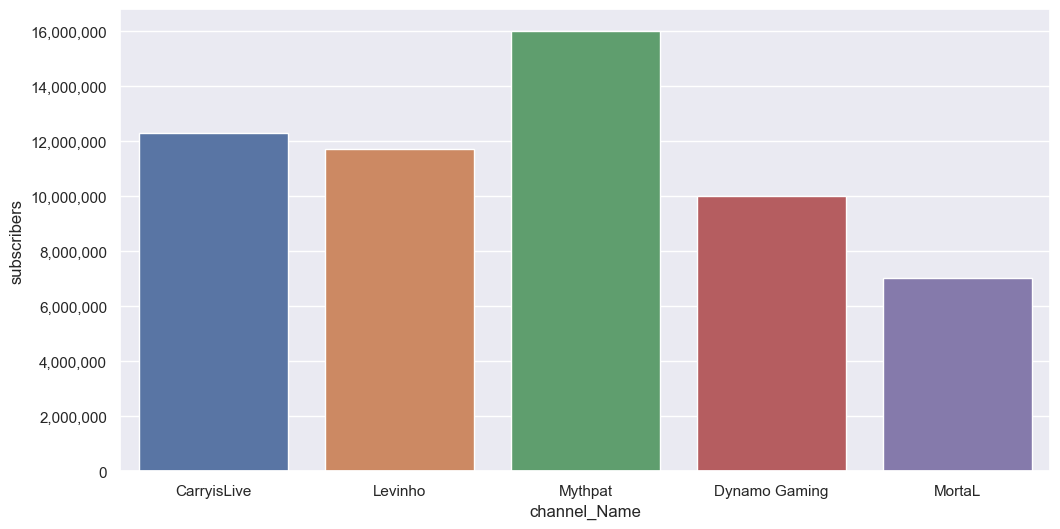

In [165]:
sns.set(rc={"figure.figsize": (12, 6)})

sc= sns.barplot(x="channel_Name", y="subscribers", data=channel_data,hue="channel_Name", legend=False)
sc.get_yaxis().set_major_formatter('{:,.0f}'.format)

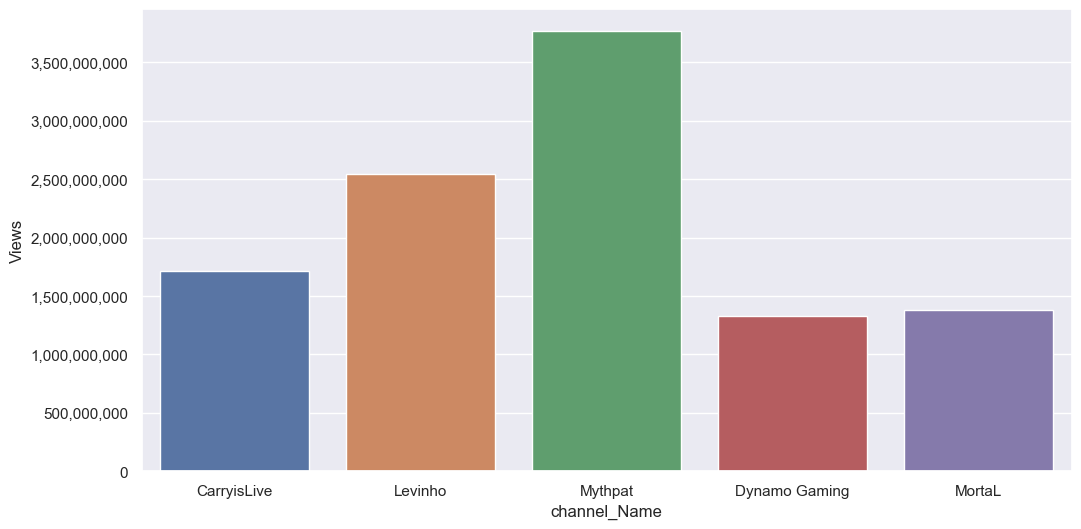

In [166]:
vc= sns.barplot(x="channel_Name", y="Views", data=channel_data,hue="channel_Name", legend=False)
vc.get_yaxis().set_major_formatter('{:,.0f}'.format)

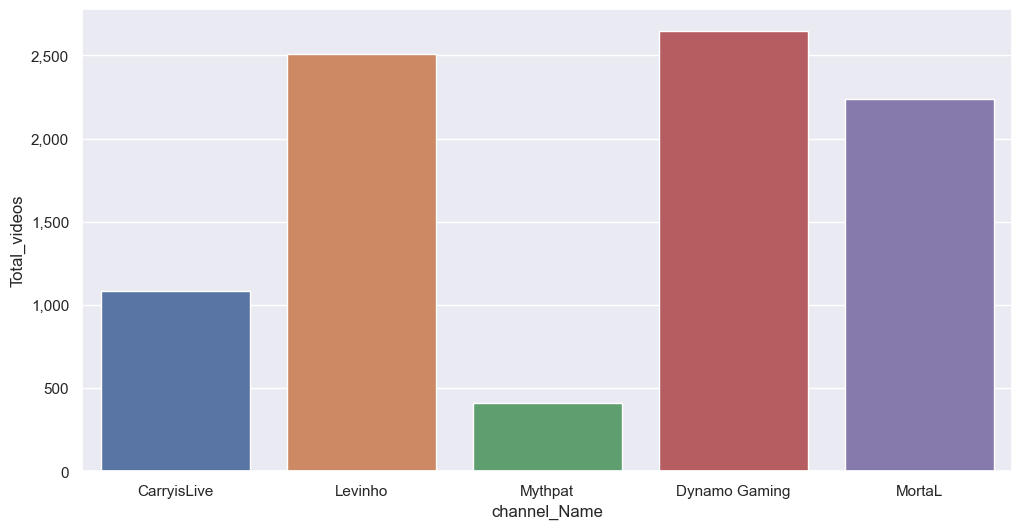

In [167]:
tc= sns.barplot(x="channel_Name", y="Total_videos", data=channel_data,hue="channel_Name", legend=False)
tc.get_yaxis().set_major_formatter('{:,.0f}'.format)

In [168]:
playList_ids = channel_data.loc[channel_data['channel_Name'] == 'Levinho', 'playlist_id'].iloc[0]
playList_ids


'UUHpEfybj_wamBKz2u6IoiGA'

In [169]:
def get_video_ids(youtube,playList_ids):
    request=youtube.playlistItems().list(part='contentDetails',playlistId = playList_ids,maxResults=50)
    response=request.execute()
    video_ids=[]
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token=response.get('nextPageToken')
    more_pages=True

    while more_pages:
        if next_page_token is None:
            more_pages=False
        else:
             request=youtube.playlistItems().list(part='contentDetails',playlistId = playList_ids,maxResults=50,pageToken=next_page_token)
             response=request.execute()
             for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
             next_page_token=response.get('nextPageToken')

    
    return video_ids

In [170]:
video_ids=get_video_ids(youtube,playList_ids)
video_ids

['PO89_DNs5nQ',
 'l49kcHywvK0',
 '5CHh7XzU9Nk',
 'OrtlAtopvU0',
 '1H3SlYb_eZ0',
 'zOpbJGYRMBE',
 '6rjeoi8UqRs',
 'QVcH8Cc_01k',
 'LhTVubcb4PI',
 'S9QlNftZiO4',
 'QwV84BhJ1ko',
 'OL844lhWu3c',
 'BTzqbdR0LOk',
 'lcWVcrrRDA0',
 '1MR-9ae_xI0',
 'IjGZ6-WETF8',
 'Ey__OKxhm7M',
 'FcdKt41GM_g',
 'E_SFwiXUUi4',
 'M4kB83mqpVg',
 'tI_UyLLErkA',
 'rpf_IREJ1F0',
 'm-SQTFG3EbE',
 'rBXC_nv2A7U',
 'Whkkjw1g4jk',
 '2q4jWuZADi8',
 'ZueNaFfvhig',
 'PzDSK0PFq4k',
 'c7lBFiEszEM',
 '46KhLCuE8xA',
 'TRxECjIUyuc',
 'zNlTt4z78HE',
 '8jxA-9HjOes',
 '4z5qkFQB4sw',
 'AmT24eiqL_Y',
 'MygToqaUbgQ',
 'dxR-OSgasI8',
 '_n3rVSaKCcs',
 'sgAvHGnW94A',
 'JliDzKNG6SA',
 '6H-dj9NrRDE',
 '7AvNzyWC5Mg',
 '_UKzsGC7xNw',
 'qHa1fWizx6A',
 'o5DoEzbmZw0',
 '1ExRIqU7NbE',
 '2FvzFs7oFTo',
 'j0T375kx3dI',
 'XJRI3fQ8jxw',
 'si-Yg5PZqMg',
 'Dh-22b0wPCA',
 'aUcD-HaW8Cg',
 'BvG6SYIeSes',
 'ffryajdXkZ0',
 'XTlWSjCI5ic',
 'lH6P-Fn0a1Y',
 'kKTC_wgGIJ4',
 '8tg0BsNd2U8',
 'Koh-6QuGwMo',
 'cTVHTTCXoF4',
 'uQ9mlc2hGj0',
 'hUtzpGB_sSA',
 '7PGMiB

function to get video details using video ids

In [171]:
def get_video_details(youtube,video_ids):
    all_video_stats=[]

    for i in range(0,len(video_ids),50):
        request=youtube.videos().list(part='snippet,statistics',id=','.join(video_ids[i:i+50]))
        response=request.execute()
        for video in response['items']:
                    video_stats=dict(Title=video['snippet']['title'],Published_date=video['snippet']['publishedAt'],
                         Views=video['statistics']['viewCount'],
                         Likes=video['statistics']['likeCount'],
                         Comments=video['statistics'].get("commentCount", 0)#we use this because for some videos the comments are turned off
                         ,
                         )
                    all_video_stats.append(video_stats)
    
    return all_video_stats

In [172]:
get_video_details(youtube,video_ids)

[{'Title': 'Lucky me 🤣 #levinho #teamvasa #pubgmobile #PandaBuddy',
  'Published_date': '2025-02-10T11:31:27Z',
  'Views': '20082',
  'Likes': '2616',
  'Comments': '48'},
 {'Title': '🔴 LEVINHO Panda Buddy $ 125.000 UC Opening | PUBG MOBILE🔴 #PandaBuddy',
  'Published_date': '2025-02-09T16:50:41Z',
  'Views': '107842',
  'Likes': '6041',
  'Comments': '74'},
 {'Title': 'Update 3.7 🔥 #levinho #teamvasa #pubgmobile #pubgmacademy',
  'Published_date': '2025-02-09T10:57:47Z',
  'Views': '17804',
  'Likes': '1912',
  'Comments': '56'},
 {'Title': 'Ultimate Royale 1v4 #levinho #teamvasa #pubgmobile',
  'Published_date': '2025-02-08T10:53:23Z',
  'Views': '26167',
  'Likes': '2681',
  'Comments': '43'},
 {'Title': '🔴 LEVINHO Solo Vs Squad 3.6 | PUBG MOBILE🔴',
  'Published_date': '2025-02-07T17:12:01Z',
  'Views': '156402',
  'Likes': '7573',
  'Comments': '57'},
 {'Title': 'Unlucky level 100😱 #levinho #teamvasa #pubgmobile',
  'Published_date': '2025-02-07T11:21:27Z',
  'Views': '115094',
  '

In [173]:
video_details=get_video_details(youtube,video_ids)

In [174]:
video_data=pd.DataFrame(video_details)
video_data

,Title,Published_date,Views,Likes,Comments
0,Lucky me 🤣 #levinho #teamvasa #pubgmobile #Pan...,2025-02-10T11:31:27Z,20082,2616,48
1,🔴 LEVINHO Panda Buddy $ 125.000 UC Opening | P...,2025-02-09T16:50:41Z,107870,6041,74
2,Update 3.7 🔥 #levinho #teamvasa #pubgmobile #p...,2025-02-09T10:57:47Z,17804,1912,56
3,Ultimate Royale 1v4 #levinho #teamvasa #pubgmo...,2025-02-08T10:53:23Z,26167,2681,43
4,🔴 LEVINHO Solo Vs Squad 3.6 | PUBG MOBILE🔴,2025-02-07T17:12:01Z,156402,7573,57
...,...,...,...,...,...
2506,Top 10 Kills | PUBG Mobile,2018-07-01T19:07:37Z,148967,6063,386
2507,Grenade Only Challenge | PUBG Mobile,2018-06-29T13:22:33Z,1092594,38184,1959
2508,Solo VS Squad | PUBG Mobile | 21 Kills Highlights,2018-06-26T09:30:58Z,147148,7893,752
2509,Arcade mode | PUBG Mobile | 12 kills win!,2018-06-22T00:43:31Z,104590,5622,429


In [175]:
video_data['Published_date']=pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views']=pd.to_numeric(video_data['Views'])
video_data['Likes']=pd.to_numeric(video_data['Likes'])
video_data['Comments']=pd.to_numeric(video_data['Comments'])


#removes emojis
def remove_emojis(text):
    return text.encode('ascii', 'ignore').decode()  # Removes emojis

# Apply to all titles
video_data['Title'] = video_data['Title'].apply(remove_emojis)

video_data


,Title,Published_date,Views,Likes,Comments
0,Lucky me #levinho #teamvasa #pubgmobile #Pand...,2025-02-10,20082,2616,48
1,LEVINHO Panda Buddy $ 125.000 UC Opening | PU...,2025-02-09,107870,6041,74
2,Update 3.7 #levinho #teamvasa #pubgmobile #pu...,2025-02-09,17804,1912,56
3,Ultimate Royale 1v4 #levinho #teamvasa #pubgmo...,2025-02-08,26167,2681,43
4,LEVINHO Solo Vs Squad 3.6 | PUBG MOBILE,2025-02-07,156402,7573,57
...,...,...,...,...,...
2506,Top 10 Kills | PUBG Mobile,2018-07-01,148967,6063,386
2507,Grenade Only Challenge | PUBG Mobile,2018-06-29,1092594,38184,1959
2508,Solo VS Squad | PUBG Mobile | 21 Kills Highlights,2018-06-26,147148,7893,752
2509,Arcade mode | PUBG Mobile | 12 kills win!,2018-06-22,104590,5622,429


In [176]:
top10_videos=video_data.sort_values(by='Views',ascending=False).head(10)
top10_videos

,Title,Published_date,Views,Likes,Comments
430,Levinho Trick 2,2023-07-24,34110182,1474802,3074
1879,My BEST GAMEPLAY In Season 13!! | PUBG MOBILE,2020-05-30,26280251,462394,11487
2305,40 SOLO KILLS NEW WORLD RECORD | SOLO VS SQUAD...,2019-03-19,23689731,465609,16667
2033,NO WEAPONS!! | CAN I WIN WITH FLARE GUN | PUBG...,2019-12-30,20498620,539707,7305
1990,Can I survive with KAR98 ONLY? | PUBG MOBILE,2020-02-17,20369601,598314,12780
2144,NEW RECORD 7 KILLS IN 32 SECONDS | 33 KILLS DU...,2019-09-10,17227421,223362,3751
1975,You will not BELIEVE this ENEMY!! | PUBG MOBILE,2020-03-03,16249792,219668,4546
2143,75 KILLS IN 2 MATCHES | TRIO VS SQUAD | PUBG M...,2019-09-11,15661669,351516,4372
2222,NEW WORLD RECORD FOUND 7 FLARE DROPS | 26 KILL...,2019-06-24,13028414,298857,11536
2117,PRETENDING TO BE A BOT | MY BEST GAMEPLAY | PU...,2019-10-07,12707815,278058,3056


<Axes: xlabel='Views', ylabel='Title'>

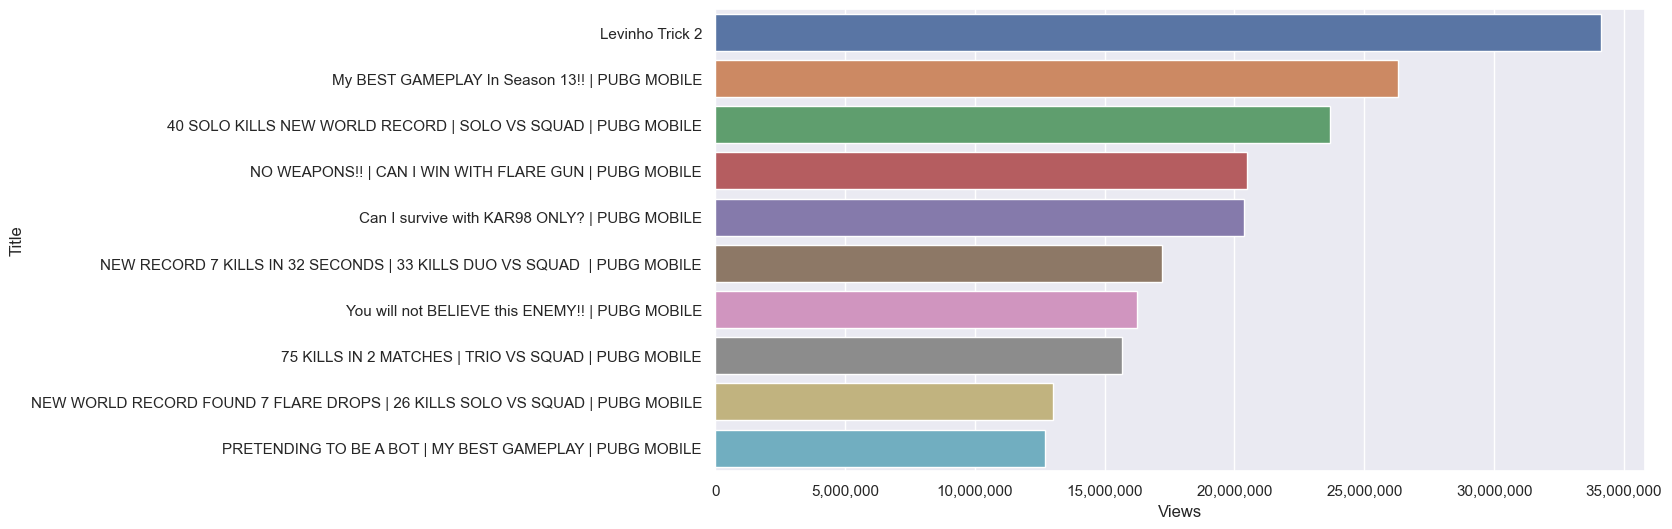

In [177]:
tv=sns.barplot(x='Views',y='Title',data=top10_videos,hue='Title',legend=False)
tv.get_xaxis().set_major_formatter('{:,.0f}'.format)
tv

#tv=sns.barplot(x=top10_videos['Published_date'],y=top10_videos['Views'],data=video_data,hue="Likes", legend=False) we can use this also

In [178]:
least_popular_videos=video_data.sort_values(by='Views',ascending=True).head(10)
least_popular_videos

,Title,Published_date,Views,Likes,Comments
2492,War Mode | 25 Kills Win | PUBG Mobile,2018-07-28,13229,580,51
2,Update 3.7 #levinho #teamvasa #pubgmobile #pu...,2025-02-09,17804,1912,56
2488,26 Killstreak | War Mode | PUBG Mobile,2018-08-02,17900,690,103
57,PMGC 2024 #levinho #pmgc2024,2024-12-06,18324,2189,39
2493,War Mode Win | 25 Kills | PUBG Mobile,2018-07-26,19644,907,87
0,Lucky me #levinho #teamvasa #pubgmobile #Pand...,2025-02-10,20082,2616,48
53,Update 3.6 #pubgmobile #levinho #teamvasa #lev...,2024-12-09,22502,1755,51
2485,How To Play Passive | War Mode | PUBG Mobile,2018-08-05,23945,754,138
60,1v3 #teamvasa #levinho #pubgm #pubgmobile,2024-12-01,24393,2113,44
3,Ultimate Royale 1v4 #levinho #teamvasa #pubgmo...,2025-02-08,26167,2681,43


<Axes: xlabel='Views', ylabel='Title'>

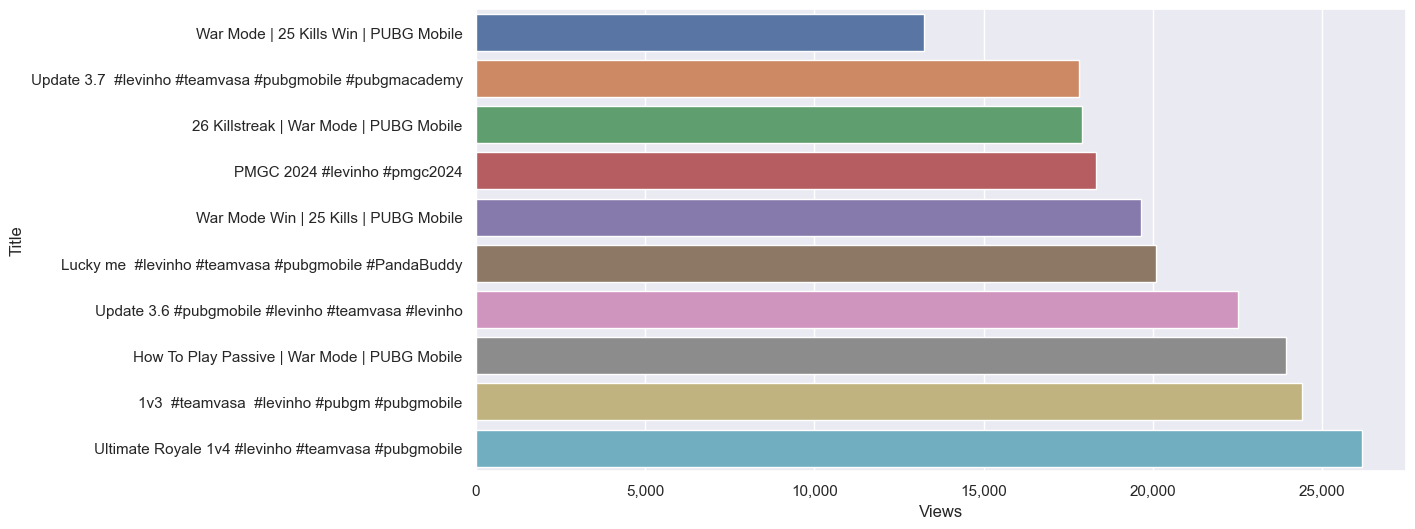

In [179]:
Lv=sns.barplot(x='Views',y='Title',data=least_popular_videos,hue='Title',legend=False)
Lv.get_xaxis().set_major_formatter('{:,.0f}'.format)
Lv